In [83]:
import pandas as pd
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

filename_patient = Path('..') / 'data' / 'patient.csv'
filename_station = Path('..') / 'data' / 'station.csv'
filename_observation = Path('..') / 'data' / 'observation.csv'

if not filename_patient.exists():
    raise FileNotFoundError(f'File patient.csv is not found')

if not filename_station.exists():
    raise FileNotFoundError(f'File station.csv is not found')

if not filename_observation.exists():
    raise FileNotFoundError(f'File observation.csv is not found')

patient_df = pd.read_csv(filename_patient, sep='\t')

observation_df = pd.read_csv(filename_observation, sep='\t')

station_df = pd.read_csv(filename_station, sep='\t')

# EDA with visualization

# patient

In [84]:
patient_df.head()

blood_group  user_id               company          registration  \
0          B-     1384         Wulf Heinz AG            2024/06/13   
1          O+     1398  Borges Moreira Ltda.  10/11/2024, 00:00:00   
2          B-      163              高橋建設有限会社  10/19/2022, 00:00:00   
3          B+      112             Yang-Gray            2019/01/19   
4          A+       92           Johnson Ltd            2019/11/10   

                                                                    address  \
0                                              Zänkerweg 6-2\n75317 Pößneck   
1  Fazenda Brenda Vieira, 51\nPiratininga\n99724-022 Novais das Pedras / SP   
2                                                        島根県豊島区上高野24丁目16番6号   
3                            93041 Wright Turnpike\nLake Loritown, RI 96307   
4                                     0089 William Run\nWest Adam, TX 90462   

   job          ssn            username  residence  \
0  NaN  079-86-6480             ilias32        NaN   
1  NaN  84926073196  pedro-miguelvargas        NaN   
2  NaN  127-45-0018          skobayashi        NaN   
3  NaN  765-77-3956           kochmario        NaN   
4  NaN  457-20-6978              paul10        NaN   

                          name  \
0  Herr Pirmin Stadelmann B.A.   
1           Sr. Matheus Cirino   
2                        中村 真綾   
3                Collin Wright   
4              Kristina Murray   

                                  current_location  \
0  (Decimal('-9.5081185'), Decimal('-108.465353'))   
1   (Decimal('38.5020005'), Decimal('151.185055'))   
2   (Decimal('87.3250985'), Decimal('-83.533367'))   
3  (Decimal('-45.2256685'), Decimal('147.973684'))   
4      (Decimal('7.750758'), Decimal('71.027557'))   

                             mail  station_ID  
0                  bruno18@gmx.de         289  
1  ana-beatrizpacheco@hotmail.com         326  
2                vmaeda@yahoo.com         594  
3                reaton@yahoo.com         738  
4           cameron61@hotmail.com         628

In [85]:
patient_df.shape

(2154, 13)

In [86]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   blood_group       2154 non-null   object 
 1   user_id           2154 non-null   int64  
 2   company           2154 non-null   object 
 3   registration      2154 non-null   object 
 4   address           1831 non-null   object 
 5   job               646 non-null    object 
 6   ssn               2154 non-null   object 
 7   username          2154 non-null   object 
 8   residence         0 non-null      float64
 9   name              2154 non-null   object 
 10  current_location  2046 non-null   object 
 11  mail              2154 non-null   object 
 12  station_ID        2154 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 218.9+ KB


In [87]:
patient_df.describe()

user_id  residence   station_ID
count  2154.000000        0.0  2154.000000
mean   1073.106778        NaN   368.611421
std     626.165384        NaN   213.766990
min       0.000000        NaN     0.000000
25%     532.250000        NaN   178.250000
50%    1072.500000        NaN   361.000000
75%    1608.500000        NaN   549.000000
max    2153.000000        NaN   745.000000

In [88]:
patient_df.isna().sum().sort_values(ascending=False)

residence           2154
job                 1508
address              323
current_location     108
blood_group            0
user_id                0
company                0
registration           0
ssn                    0
username               0
name                   0
mail                   0
station_ID             0
dtype: int64

In [89]:
patient_df.nunique().sort_values(ascending=False)

ssn                 2154
mail                2149
username            2130
name                2099
current_location    2046
company             1956
registration        1949
address             1831
user_id             1360
station_ID           696
job                  390
blood_group            8
residence              0
dtype: int64

In [90]:
patient_df['blood_group'].unique()

array(['B-', 'O+', 'B+', 'A+', 'A-', 'AB-', 'AB+', 'O-'], dtype=object)

In [91]:
patient_df.groupby('blood_group').size()

blood_group
A+     254
A-     299
AB+    268
AB-    277
B+     256
B-     260
O+     269
O-     271
dtype: int64

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'residence'}>],
       [<Axes: title={'center': 'station_ID'}>, <Axes: >]], dtype=object)

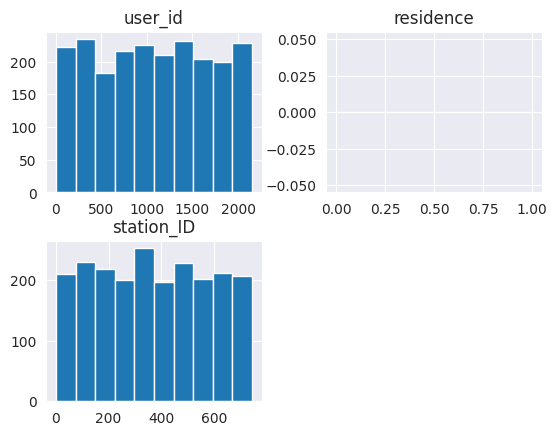

In [92]:
patient_df.hist()

# station

In [93]:
station_df.head()

station  longitude         location   QoS  latitude     revision
0     Kenda   86.51499     Asia/Kolkata  good  23.19590  17 Jun 2018
1    Canton  -83.48216  America/Detroit  good  42.30865   2022/10/10
2    Zaysan   84.87144      Asia/Almaty  good  47.46657   2016/11/06
3  Shushary   30.38167    Europe/Moscow  good  59.80917   2022/09/10
4   Cheraga    2.95924   Africa/Algiers  good  36.76775  07 Jan 2024

In [94]:
station_df.shape

(746, 6)

In [95]:
station_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   station    746 non-null    object 
 1   longitude  746 non-null    float64
 2   location   746 non-null    object 
 3   QoS        746 non-null    object 
 4   latitude   746 non-null    float64
 5   revision   746 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.1+ KB


In [96]:
station_df.describe()

longitude    latitude
count  746.000000  746.000000
mean     5.941826   28.956844
std     72.705721   23.569270
min   -123.026210  -54.800000
25%    -68.057805   16.455000
50%      8.818865   36.211865
75%     65.450023   45.499673
max    178.004170   68.798330

In [97]:
station_df.isna().sum().sort_values(ascending=False)

station      0
longitude    0
location     0
QoS          0
latitude     0
revision     0
dtype: int64

In [98]:
station_df.nunique().sort_values(ascending=False)

revision     727
station      520
longitude    520
latitude     520
location     139
QoS            4
dtype: int64

In [99]:
station_df['QoS'].unique()

array(['good', 'acceptable', 'excellent', 'maintenance'], dtype=object)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>]], dtype=object)

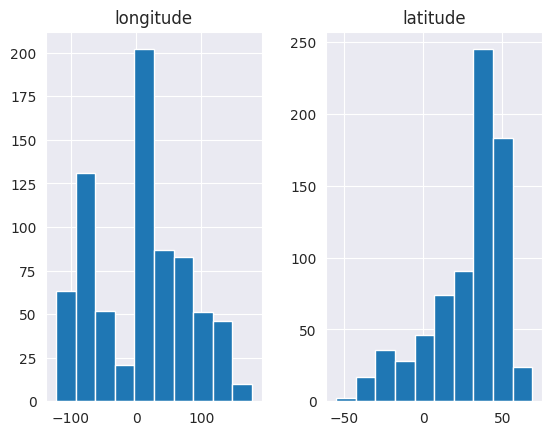

In [100]:
station_df.hist()

# observation

In [101]:
observation_df.head()

SpO₂         HR         PI         RR      EtCO₂       FiO₂  \
0  96.491498  75.410035  11.966950  14.781380  38.814201  60.447244   
1  97.657620  90.314511   9.500074  16.118786  42.528828  60.183638   
2  96.528162  79.127147  11.268005  15.921648  41.262696  77.600291   
3  98.195660  83.015909  14.140633  14.348950  40.283494  59.027420   
4  97.573527  83.388999   9.058458  17.513347  39.844401  49.965222   

          PRV          BP  Skin Temperature  Motion/Activity index  ...  \
0  130.452955   94.990567         34.465008               8.254118  ...   
1  106.651627  107.891610         37.058675               9.514584  ...   
2  131.520657  109.497981         36.934570              10.435298  ...   
3  144.702141  101.915115         34.855279               8.896198  ...   
4  111.977370   98.441554         36.833986               7.009457  ...   

         CO  Blood Flow Index  PPG waveform features  Signal Quality Index  \
0  4.000203         80.401412              36.370500             51.040438   
1  4.073080         63.098636              26.194633             50.549199   
2  4.000805         47.467045              47.915005             44.390213   
3  4.003649         36.139538              51.788271             55.517932   
4  4.004251         47.409300              86.559604             40.041646   

   Respiratory effort  O₂ extraction ratio        SNR  oximetry  latitude  \
0           27.830965             0.286386  26.305034       1.0   6.84019   
1           51.169605             0.257752  28.282578       1.0 -29.29750   
2           45.069050             0.255257  34.529833       1.0   9.33370   
3           29.478669             0.255097  36.136759       1.0  33.54428   
4           53.128176             0.286358  23.648813       1.0  50.80019   

   longitude  
0   79.87116  
1  -51.50361  
2  122.86370  
3  -84.23381  
4    7.20769  

[5 rows x 23 columns]

In [102]:
observation_df.shape

(12133, 23)

In [103]:
observation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12133 entries, 0 to 12132
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SpO₂                   12133 non-null  float64
 1   HR                     12133 non-null  float64
 2   PI                     12133 non-null  float64
 3   RR                     12133 non-null  float64
 4   EtCO₂                  12133 non-null  float64
 5   FiO₂                   12133 non-null  float64
 6   PRV                    12133 non-null  float64
 7   BP                     12133 non-null  float64
 8   Skin Temperature       12133 non-null  float64
 9   Motion/Activity index  12133 non-null  float64
 10  PVI                    12133 non-null  float64
 11  Hb level               12133 non-null  float64
 12  SV                     12133 non-null  float64
 13  CO                     12133 non-null  float64
 14  Blood Flow Index       12133 non-null  float64
 15  PP

In [104]:
observation_df.describe()

SpO₂            HR            PI            RR         EtCO₂  \
count  12133.000000  12133.000000  12133.000000  12133.000000  12133.000000   
mean      97.409019     83.114699      9.734597     16.137013     40.556298   
std        0.740892      5.573951      2.698232      1.032176      1.269783   
min       95.000000     60.000000      0.200000     12.000000     35.000000   
25%       96.834760     78.810257      7.917530     15.452009     39.722449   
50%       97.315208     82.950379      9.704334     16.138621     40.605869   
75%       98.031972     87.429912     11.564319     16.830714     41.417182   
max      100.000000    100.000000     20.000000     20.000000     45.000000   

               FiO₂           PRV            BP  Skin Temperature  \
count  12133.000000  12133.000000  12133.000000      12133.000000   
mean      59.457167    116.650960    103.600513         35.711715   
std       10.767989     29.860181      3.591584          0.605758   
min       21.000000     20.000000     90.000000         33.000000   
25%       52.246367     94.306159    101.190550         35.306966   
50%       59.506589    121.038850    103.589050         35.711292   
75%       66.658016    139.611881    106.009289         36.111692   
max      100.000000    200.000000    120.000000         38.000000   

       Motion/Activity index  ...            CO  Blood Flow Index  \
count           12133.000000  ...  12133.000000      12133.000000   
mean               10.085522  ...      4.036754         51.869686   
std                 1.441347  ...      0.139381         12.231608   
min                 4.596843  ...      4.000000          0.000000   
25%                 9.135083  ...      4.000704         43.553167   
50%                10.071304  ...      4.003555         51.951194   
75%                11.034590  ...      4.022252         60.078158   
max                16.168825  ...      8.000000        100.000000   

       PPG waveform features  Signal Quality Index  Respiratory effort  \
count           12133.000000          12133.000000        12133.000000   
mean               50.355038             49.713851           49.096870   
std                12.282171             12.949734           12.763442   
min                 0.000000              0.000000            0.000000   
25%                41.981568             40.927906           40.507353   
50%                50.397988             49.618836           49.267523   
75%                58.768481             58.501520           57.786931   
max               100.000000            100.000000          100.000000   

       O₂ extraction ratio           SNR      oximetry      latitude  \
count         12133.000000  12133.000000  12133.000000  12133.000000   
mean              0.249540     29.977247      0.596472     28.978655   
std               0.028898      5.759219      0.490625     23.532252   
min               0.200000     20.000000      0.000000    -54.800000   
25%               0.224546     24.977873      0.000000     16.455000   
50%               0.249141     30.062375      1.000000     36.215440   
75%               0.274581     34.934766      1.000000     45.516670   
max               0.300000     40.000000      1.000000     68.798330   

          longitude  
count  12133.000000  
mean       6.119119  
std       72.653597  
min     -123.026210  
25%      -68.300000  
50%        8.867040  
75%       65.509170  
max      178.004170  

[8 rows x 23 columns]

In [105]:
observation_df.isna().sum().sort_values(ascending=False)

SpO₂                     0
SV                       0
latitude                 0
oximetry                 0
SNR                      0
O₂ extraction ratio      0
Respiratory effort       0
Signal Quality Index     0
PPG waveform features    0
Blood Flow Index         0
CO                       0
Hb level                 0
HR                       0
PVI                      0
Motion/Activity index    0
Skin Temperature         0
BP                       0
PRV                      0
FiO₂                     0
EtCO₂                    0
RR                       0
PI                       0
longitude                0
dtype: int64

In [106]:
observation_df.nunique().sort_values(ascending=False)

SpO₂                     11954
HR                       11954
SNR                      11954
O₂ extraction ratio      11954
Respiratory effort       11954
Signal Quality Index     11954
PPG waveform features    11954
Blood Flow Index         11954
CO                       11954
SV                       11954
Hb level                 11954
PVI                      11954
Motion/Activity index    11954
Skin Temperature         11954
BP                       11954
PRV                      11954
FiO₂                     11954
EtCO₂                    11954
RR                       11954
PI                       11954
latitude                   520
longitude                  520
oximetry                     2
dtype: int64

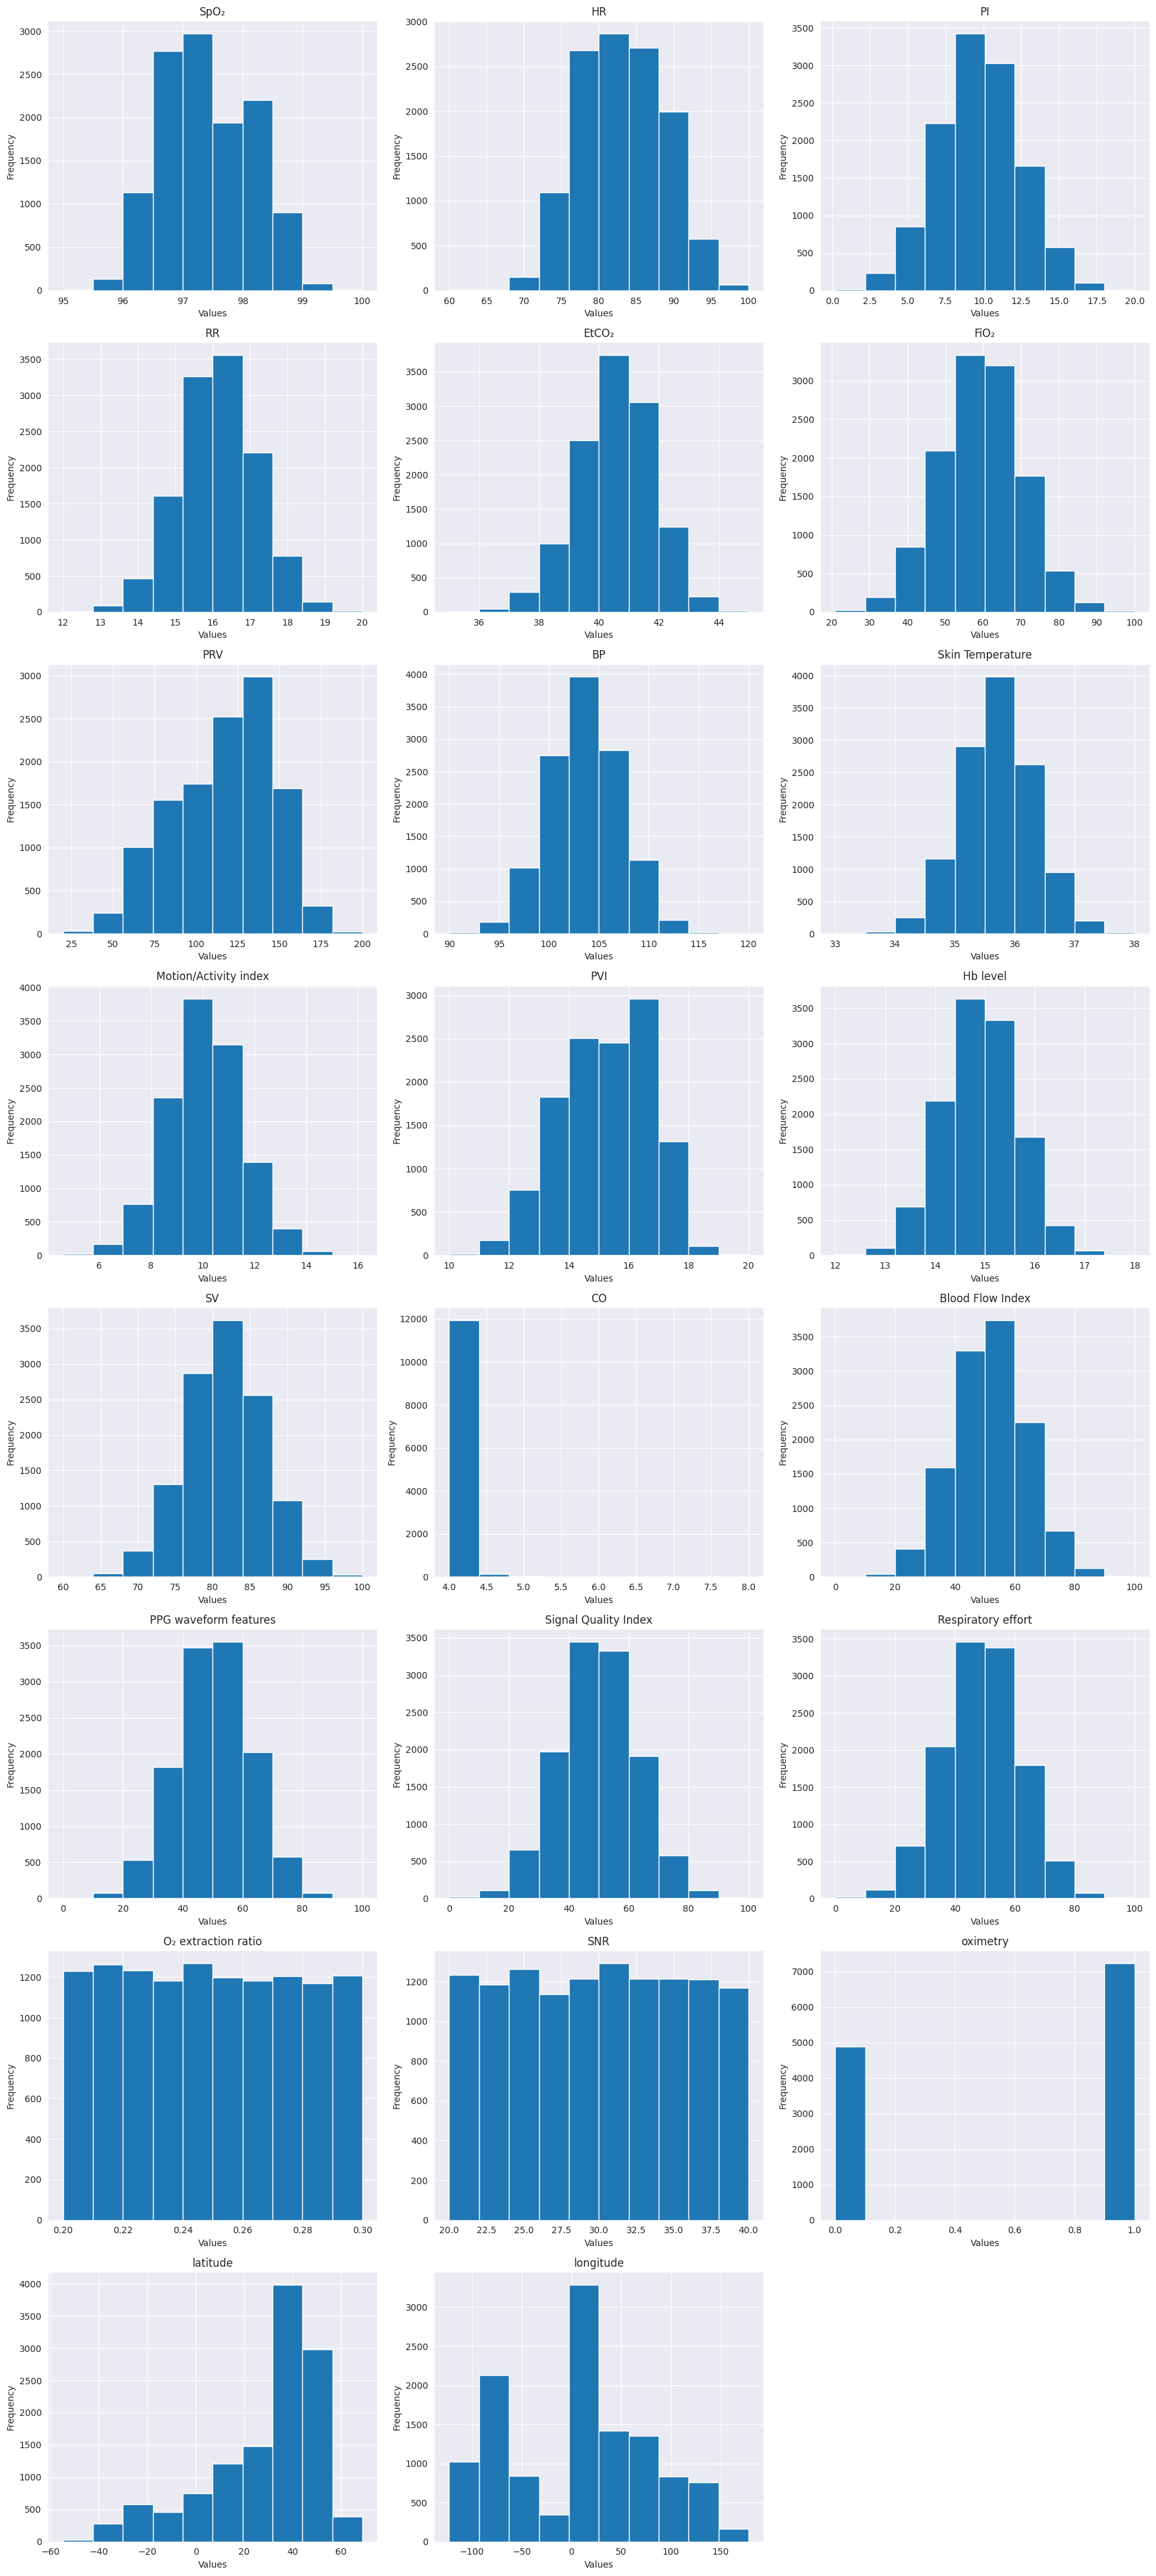

In [107]:
plt.rcParams['font.family'] = 'DejaVu Sans'
numeric_cols = observation_df.select_dtypes(include='number').columns

n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    observation_df[col].hist(ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


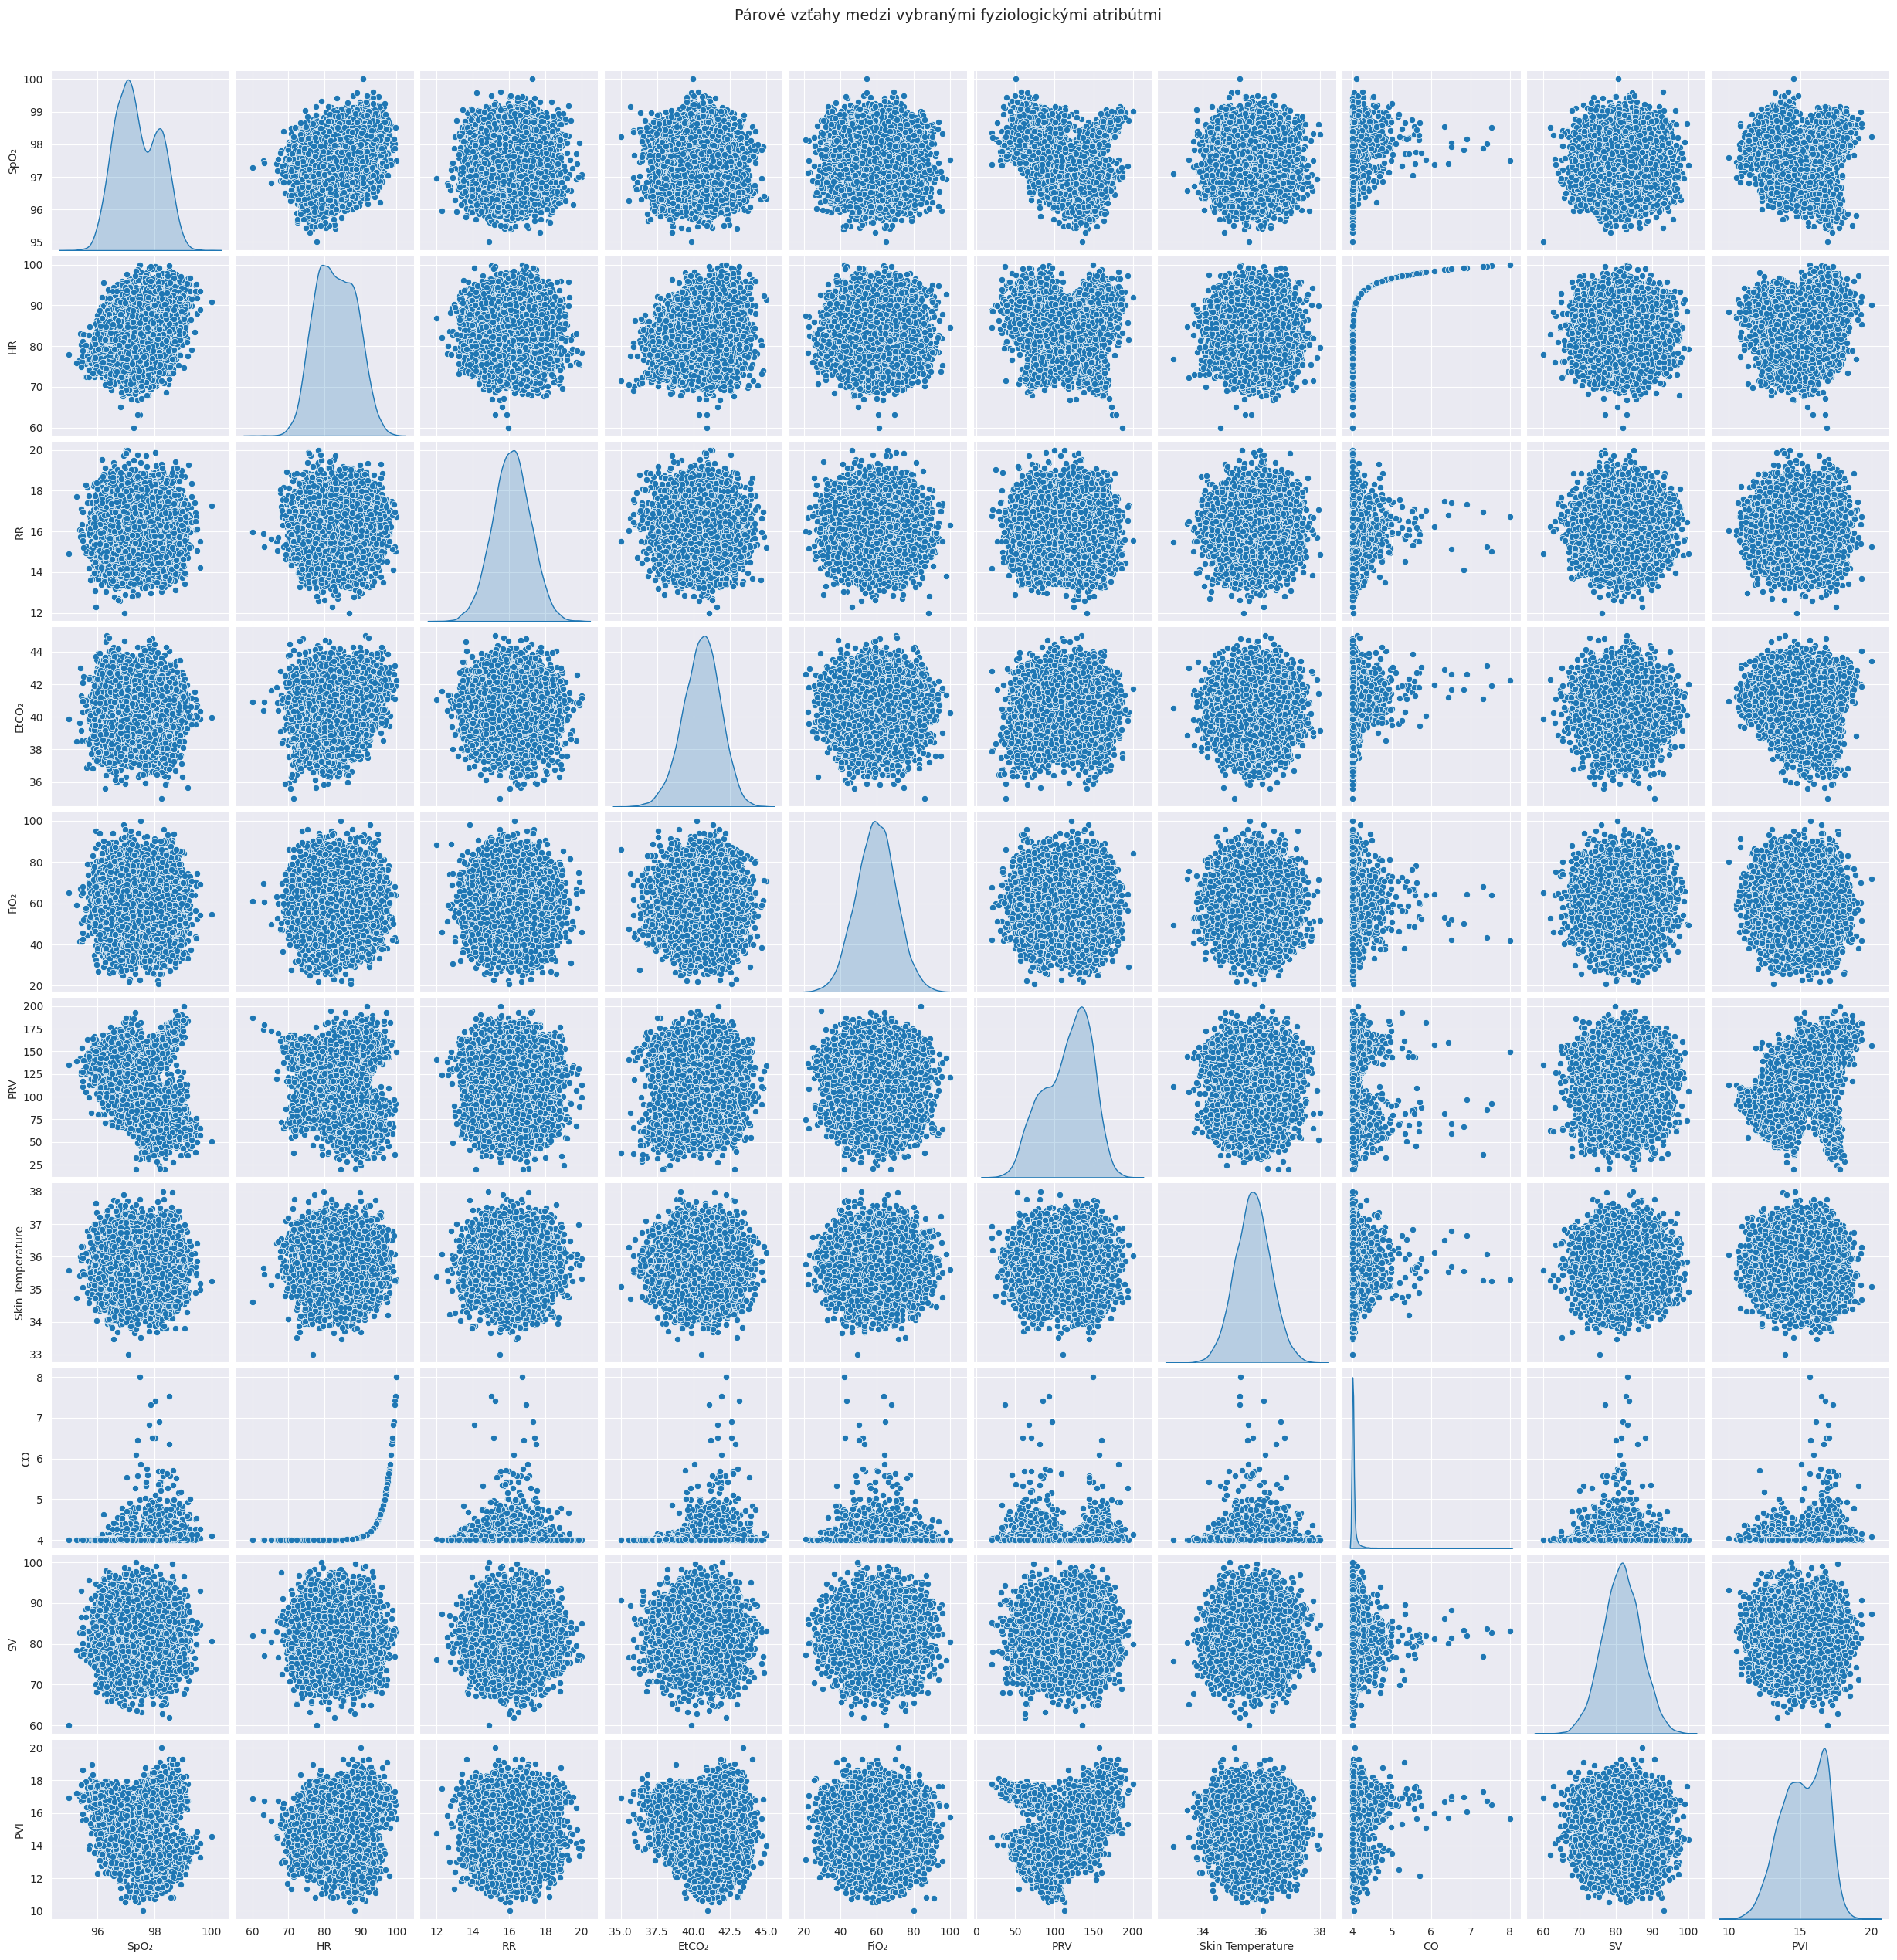

In [108]:
plt.rcParams['font.family'] = 'DejaVu Sans'

selected_cols = [
    'SpO₂', 'HR', 'RR', 'EtCO₂', 'FiO₂',
    'PRV', 'Skin Temperature', 'CO', 'SV', 'PVI'
]

corr_matrix = observation_df.corr(numeric_only=True)

sns.pairplot(
    observation_df[selected_cols],
    diag_kind="kde"
)
plt.suptitle("Párové vzťahy medzi vybranými fyziologickými atribútmi", y=1.02, fontsize=14)
plt.show()


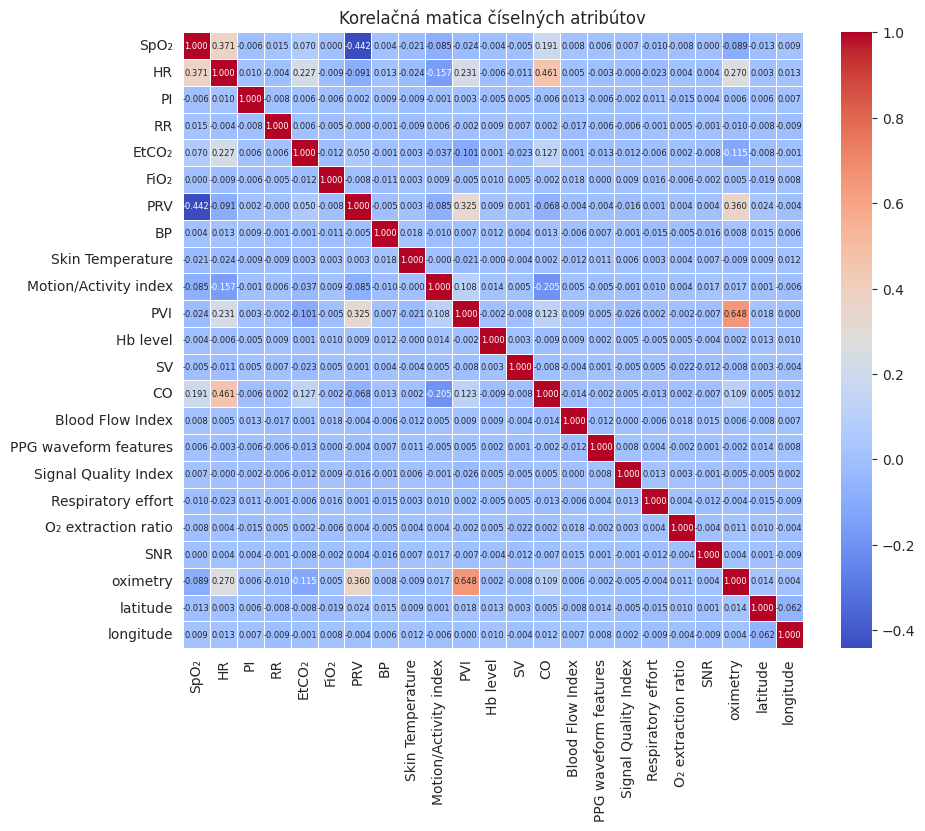

In [109]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, ax=ax, annot=True, fmt=".3f", annot_kws={"size": 6}, cmap="coolwarm", linewidths=0.5)
plt.title("Korelačná matica číselných atribútov")
plt.show()

In [110]:
expected_ranges = {
    'SpO₂': (95, 100),
    'HR': (60, 100),
    'RR': (12, 20),
    'EtCO₂': (35, 45),
    'FiO₂': (21, 100),
    'PRV': (20, 200),
    'Skin Temperature': (33, 38),
    'CO': (4, 8),
    'SV': (60, 100),
    'PVI': (10, 20)
}

results = []
for col, (low, high) in expected_ranges.items():
    data = observation_df[col].dropna()
    below = (data < low).sum()
    above = (data > high).sum()
    total = len(data)
    results.append({
        "Atribút": col,
        "Rozsah": f"{low}–{high}",
        "Pod rozsahom": below,
        "Nad rozsahom": above,
        "Spolu meraní": total,
        "OK (%)": round((total - below - above) / total * 100, 2) if total > 0 else 0
    })

check_df = pd.DataFrame(results)
display(check_df)

Atribút  Rozsah  Pod rozsahom  Nad rozsahom  Spolu meraní  OK (%)
0              SpO₂  95–100             0             0         12133   100.0
1                HR  60–100             0             0         12133   100.0
2                RR   12–20             0             0         12133   100.0
3             EtCO₂   35–45             0             0         12133   100.0
4              FiO₂  21–100             0             0         12133   100.0
5               PRV  20–200             0             0         12133   100.0
6  Skin Temperature   33–38             0             0         12133   100.0
7                CO     4–8             0             0         12133   100.0
8                SV  60–100             0             0         12133   100.0
9               PVI   10–20             0             0         12133   100.0

In [111]:
corr = observation_df.corr()['oximetry'].sort_values(ascending=False)
print(corr)

oximetry                 1.000000
PVI                      0.647569
PRV                      0.360077
HR                       0.270072
CO                       0.109312
Motion/Activity index    0.016665
latitude                 0.014292
O₂ extraction ratio      0.011485
BP                       0.008303
PI                       0.006421
Blood Flow Index         0.005580
FiO₂                     0.004907
SNR                      0.004251
longitude                0.004003
Hb level                 0.002060
PPG waveform features   -0.001821
Respiratory effort      -0.004276
Signal Quality Index    -0.005339
SV                      -0.007693
Skin Temperature        -0.008894
RR                      -0.010002
SpO₂                    -0.088682
EtCO₂                   -0.115092
Name: oximetry, dtype: float64


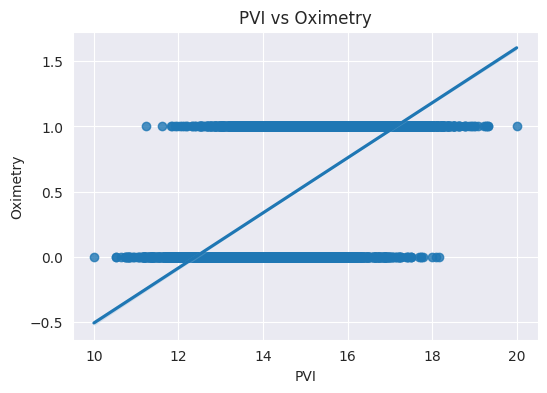

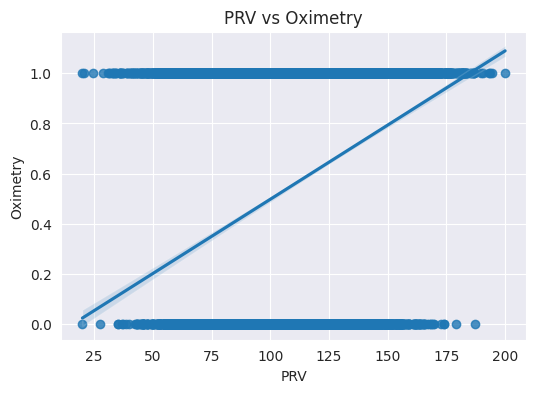

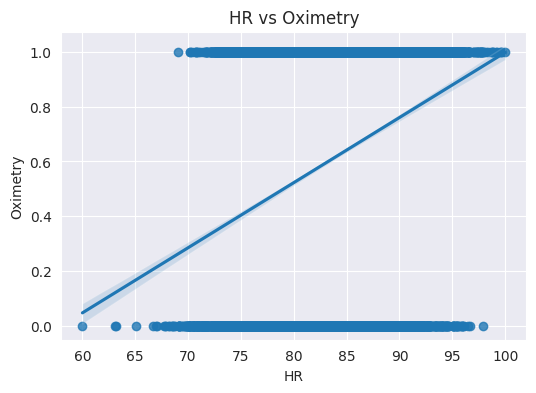

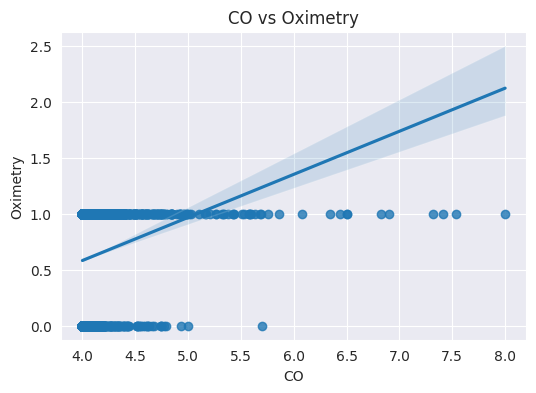

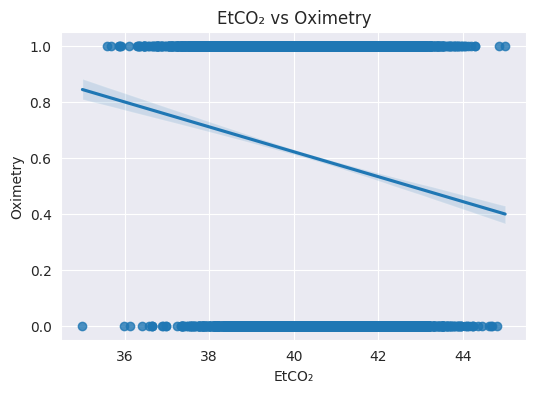

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt


top_features = ['PVI', 'PRV', 'HR', 'CO', 'EtCO₂']

for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=observation_df, x=feature, y='oximetry')
    plt.title(f'{feature} vs Oximetry')
    plt.xlabel(feature)
    plt.ylabel('Oximetry')
    plt.show()


# Cleaning

In [113]:
patient_df['address'] = patient_df['address'].str.replace('\n', ', ').str.replace('\r', '')
patient_df.head()

blood_group  user_id               company          registration  \
0          B-     1384         Wulf Heinz AG            2024/06/13   
1          O+     1398  Borges Moreira Ltda.  10/11/2024, 00:00:00   
2          B-      163              高橋建設有限会社  10/19/2022, 00:00:00   
3          B+      112             Yang-Gray            2019/01/19   
4          A+       92           Johnson Ltd            2019/11/10   

                                                                    address  \
0                                              Zänkerweg 6-2, 75317 Pößneck   
1  Fazenda Brenda Vieira, 51, Piratininga, 99724-022 Novais das Pedras / SP   
2                                                        島根県豊島区上高野24丁目16番6号   
3                            93041 Wright Turnpike, Lake Loritown, RI 96307   
4                                     0089 William Run, West Adam, TX 90462   

   job          ssn            username  residence  \
0  NaN  079-86-6480             ilias32        NaN   
1  NaN  84926073196  pedro-miguelvargas        NaN   
2  NaN  127-45-0018          skobayashi        NaN   
3  NaN  765-77-3956           kochmario        NaN   
4  NaN  457-20-6978              paul10        NaN   

                          name  \
0  Herr Pirmin Stadelmann B.A.   
1           Sr. Matheus Cirino   
2                        中村 真綾   
3                Collin Wright   
4              Kristina Murray   

                                  current_location  \
0  (Decimal('-9.5081185'), Decimal('-108.465353'))   
1   (Decimal('38.5020005'), Decimal('151.185055'))   
2   (Decimal('87.3250985'), Decimal('-83.533367'))   
3  (Decimal('-45.2256685'), Decimal('147.973684'))   
4      (Decimal('7.750758'), Decimal('71.027557'))   

                             mail  station_ID  
0                  bruno18@gmx.de         289  
1  ana-beatrizpacheco@hotmail.com         326  
2                vmaeda@yahoo.com         594  
3                reaton@yahoo.com         738  
4           cameron61@hotmail.com         628

In [114]:
patient_df['registration'] = (
    patient_df['registration']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

patient_df['registration'] = pd.to_datetime(
    patient_df['registration'],
    errors='coerce',
    format='mixed'
)
patient_df.head()

blood_group  user_id               company registration  \
0          B-     1384         Wulf Heinz AG   2024-06-13   
1          O+     1398  Borges Moreira Ltda.   2024-10-11   
2          B-      163              高橋建設有限会社   2022-10-19   
3          B+      112             Yang-Gray   2019-01-19   
4          A+       92           Johnson Ltd   2019-11-10   

                                                                    address  \
0                                              Zänkerweg 6-2, 75317 Pößneck   
1  Fazenda Brenda Vieira, 51, Piratininga, 99724-022 Novais das Pedras / SP   
2                                                        島根県豊島区上高野24丁目16番6号   
3                            93041 Wright Turnpike, Lake Loritown, RI 96307   
4                                     0089 William Run, West Adam, TX 90462   

   job          ssn            username  residence  \
0  NaN  079-86-6480             ilias32        NaN   
1  NaN  84926073196  pedro-miguelvargas        NaN   
2  NaN  127-45-0018          skobayashi        NaN   
3  NaN  765-77-3956           kochmario        NaN   
4  NaN  457-20-6978              paul10        NaN   

                          name  \
0  Herr Pirmin Stadelmann B.A.   
1           Sr. Matheus Cirino   
2                        中村 真綾   
3                Collin Wright   
4              Kristina Murray   

                                  current_location  \
0  (Decimal('-9.5081185'), Decimal('-108.465353'))   
1   (Decimal('38.5020005'), Decimal('151.185055'))   
2   (Decimal('87.3250985'), Decimal('-83.533367'))   
3  (Decimal('-45.2256685'), Decimal('147.973684'))   
4      (Decimal('7.750758'), Decimal('71.027557'))   

                             mail  station_ID  
0                  bruno18@gmx.de         289  
1  ana-beatrizpacheco@hotmail.com         326  
2                vmaeda@yahoo.com         594  
3                reaton@yahoo.com         738  
4           cameron61@hotmail.com         628

In [115]:
patient_df['residence'].unique()

array([nan])

In [116]:
patient_df = patient_df.drop(columns=['residence'])

patient_df.head()

blood_group  user_id               company registration  \
0          B-     1384         Wulf Heinz AG   2024-06-13   
1          O+     1398  Borges Moreira Ltda.   2024-10-11   
2          B-      163              高橋建設有限会社   2022-10-19   
3          B+      112             Yang-Gray   2019-01-19   
4          A+       92           Johnson Ltd   2019-11-10   

                                                                    address  \
0                                              Zänkerweg 6-2, 75317 Pößneck   
1  Fazenda Brenda Vieira, 51, Piratininga, 99724-022 Novais das Pedras / SP   
2                                                        島根県豊島区上高野24丁目16番6号   
3                            93041 Wright Turnpike, Lake Loritown, RI 96307   
4                                     0089 William Run, West Adam, TX 90462   

   job          ssn            username                         name  \
0  NaN  079-86-6480             ilias32  Herr Pirmin Stadelmann B.A.   
1  NaN  84926073196  pedro-miguelvargas           Sr. Matheus Cirino   
2  NaN  127-45-0018          skobayashi                        中村 真綾   
3  NaN  765-77-3956           kochmario                Collin Wright   
4  NaN  457-20-6978              paul10              Kristina Murray   

                                  current_location  \
0  (Decimal('-9.5081185'), Decimal('-108.465353'))   
1   (Decimal('38.5020005'), Decimal('151.185055'))   
2   (Decimal('87.3250985'), Decimal('-83.533367'))   
3  (Decimal('-45.2256685'), Decimal('147.973684'))   
4      (Decimal('7.750758'), Decimal('71.027557'))   

                             mail  station_ID  
0                  bruno18@gmx.de         289  
1  ana-beatrizpacheco@hotmail.com         326  
2                vmaeda@yahoo.com         594  
3                reaton@yahoo.com         738  
4           cameron61@hotmail.com         628

In [117]:
station_df[['continent', 'city']] = station_df['location'].str.rsplit('/', n=1, expand=True)
station_df = station_df.drop(columns=['location'])
station_df.head()

station  longitude   QoS  latitude     revision continent     city
0     Kenda   86.51499  good  23.19590  17 Jun 2018      Asia  Kolkata
1    Canton  -83.48216  good  42.30865   2022/10/10   America  Detroit
2    Zaysan   84.87144  good  47.46657   2016/11/06      Asia   Almaty
3  Shushary   30.38167  good  59.80917   2022/09/10    Europe   Moscow
4   Cheraga    2.95924  good  36.76775  07 Jan 2024    Africa  Algiers

In [118]:
station_df['revision'] = (
    station_df['revision']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.strip()
)

station_df['revision'] = pd.to_datetime(
    station_df['revision'],
    errors='coerce',
    format='mixed'  
)
station_df.head()


station  longitude   QoS  latitude   revision continent     city
0     Kenda   86.51499  good  23.19590 2018-06-17      Asia  Kolkata
1    Canton  -83.48216  good  42.30865 2022-10-10   America  Detroit
2    Zaysan   84.87144  good  47.46657 2016-11-06      Asia   Almaty
3  Shushary   30.38167  good  59.80917 2022-09-10    Europe   Moscow
4   Cheraga    2.95924  good  36.76775 2024-01-07    Africa  Algiers

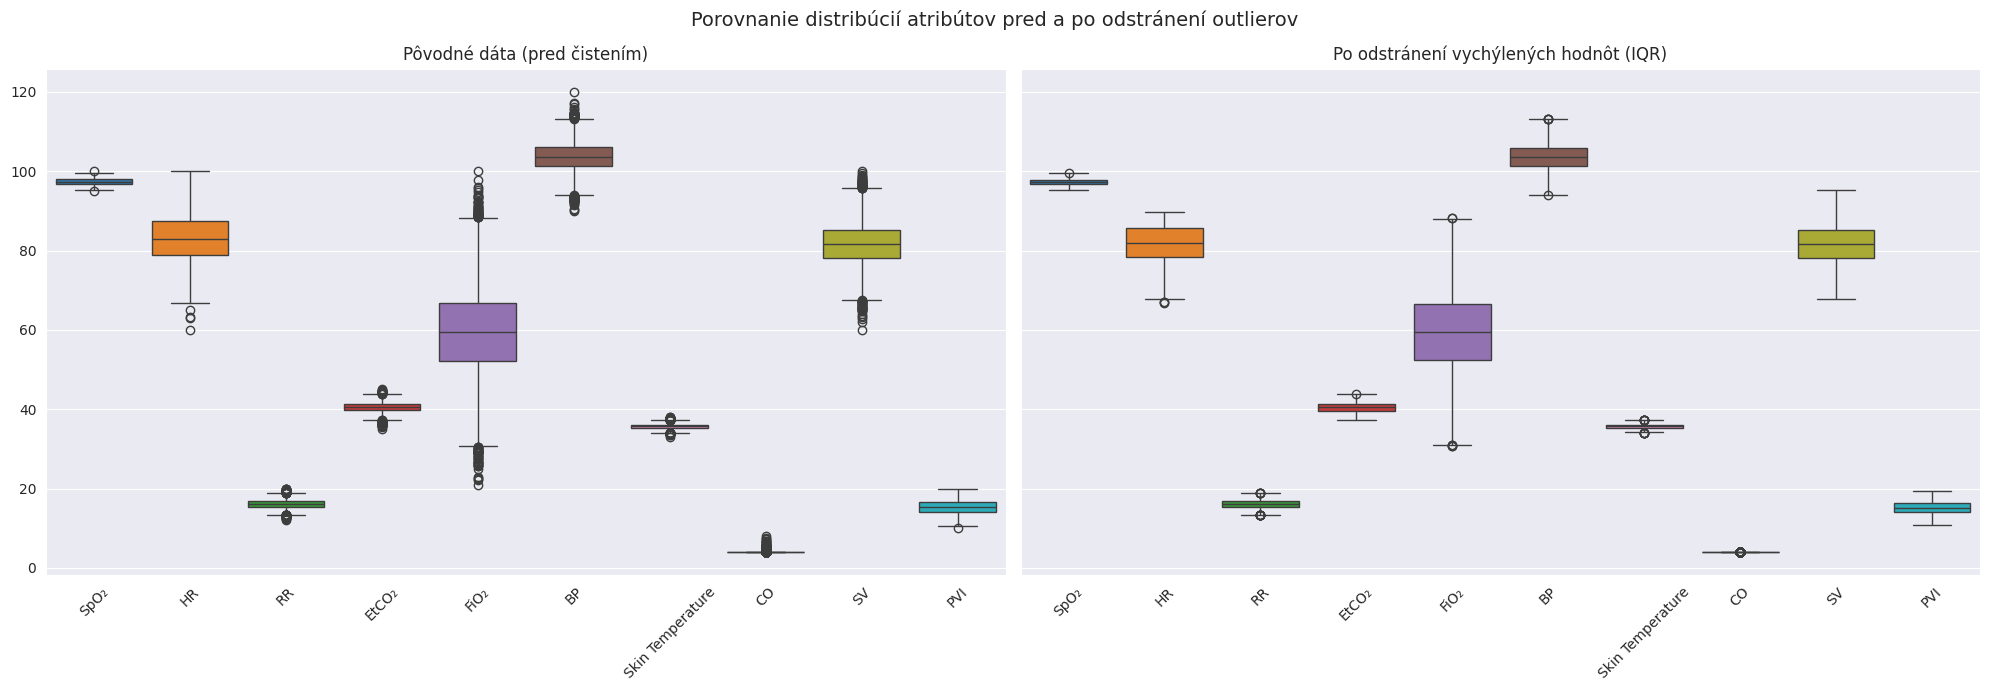

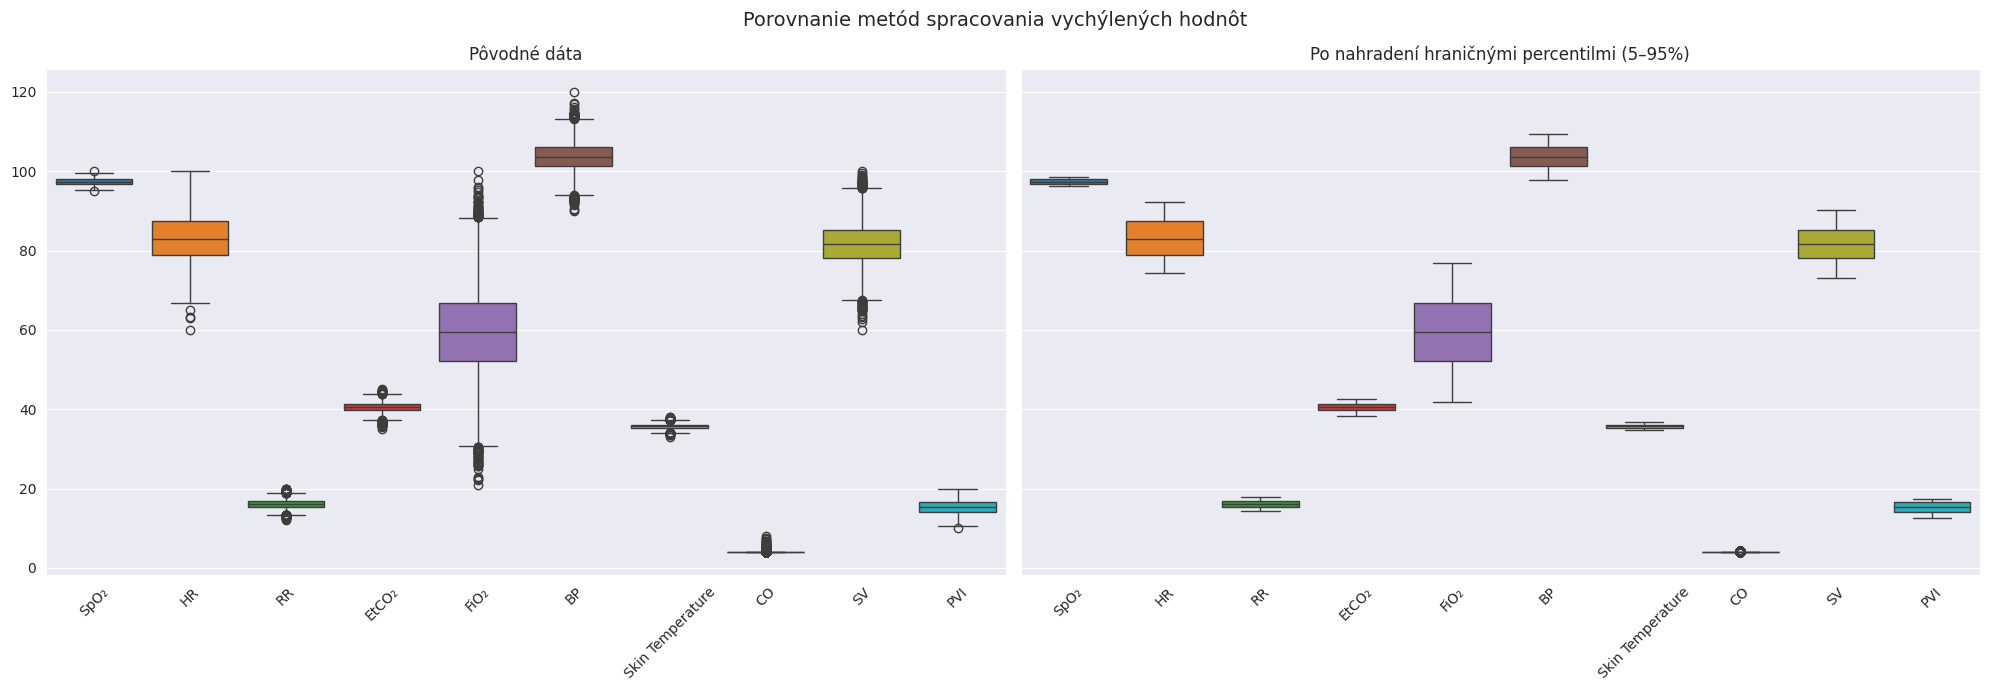

In [119]:
numeric_cols = [
    'SpO₂', 'HR', 'RR', 'EtCO₂', 'FiO₂',
    'BP', 'Skin Temperature', 'CO', 'SV', 'PVI'
]

# Odstránenie outlierov pomocou IQR
iqr_df = observation_df.copy()

for col in numeric_cols:
    Q1 = iqr_df[col].quantile(0.25)
    Q3 = iqr_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    iqr_df = iqr_df[(iqr_df[col] >= lower) & (iqr_df[col] <= upper)]

# Nahradenie extrémnych hodnôt
clip_df = observation_df.copy()

for col in numeric_cols:
    low, high = clip_df[col].quantile([0.05, 0.95])
    clip_df[col] = np.clip(clip_df[col], low, high)

# pôvodné vs po spracovaní
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

sns.boxplot(data=observation_df[numeric_cols], ax=axes[0])
axes[0].set_title("Pôvodné dáta (pred čistením)")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=iqr_df[numeric_cols], ax=axes[1])
axes[1].set_title("Po odstránení vychýlených hodnôt (IQR)")
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle("Porovnanie distribúcií atribútov pred a po odstránení outlierov", fontsize=14)
plt.tight_layout()
plt.show()

# percentilové nahradenie
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

sns.boxplot(data=observation_df[numeric_cols], ax=axes[0])
axes[0].set_title("Pôvodné dáta")

sns.boxplot(data=clip_df[numeric_cols], ax=axes[1])
axes[1].set_title("Po nahradení hraničnými percentilmi (5–95%)")

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Porovnanie metód spracovania vychýlených hodnôt", fontsize=14)
plt.tight_layout()
plt.show()


# Formulácia a štatistické overenie hypotéz o dátach

Pearsonova korelácia HR–RR: -0.004
p-hodnota: 0.68234
→ Nezamietame H₀: Nebol dokázaný významný vzťah medzi HR a RR.


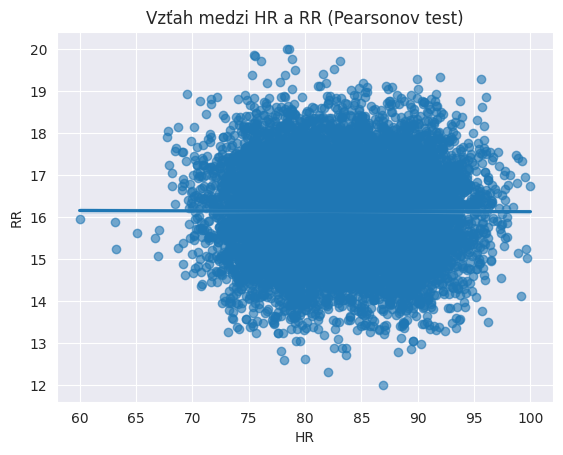


Test normality (D’Agostino–Pearson):
Low PVI p-hodnota = 0.00000
High PVI p-hodnota = 0.00000
→ Dáta sa významne odchyľujú od normálneho rozdelenia (p < 0.05).
Použijeme neparametrický test (Mann–Whitney U).

Mann–Whitney U test: U=7179410.00, p-hodnota=0.00000
→ Zamietame H₀: Priemerné hodnoty oximetrie sa štatisticky významne líšia.


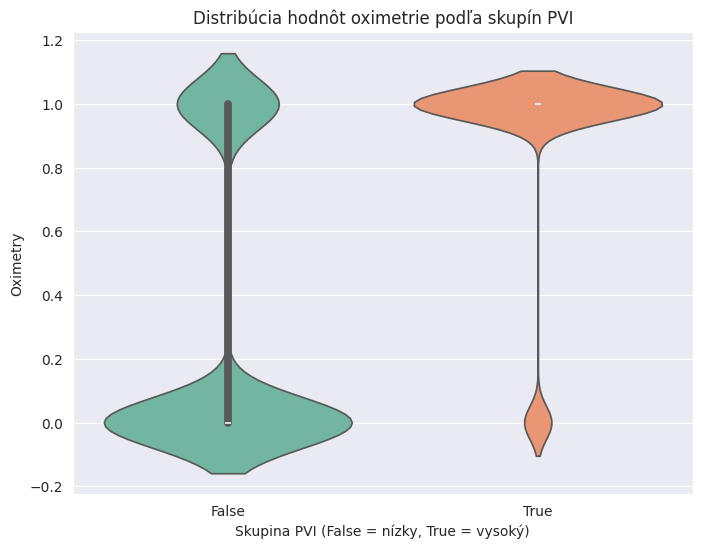

In [120]:
import scipy.stats as stats
# HYPOTÉZA 1:
# H₀: Neexistuje lineárny vzťah medzi HR (tepová frekvencia) a RR (respiračná frekvencia)
# H₁: Existuje lineárny vzťah medzi HR a RR

x = observation_df['HR'].dropna()
y = observation_df['RR'].dropna()

corr_coef, p_value = stats.pearsonr(x, y)

print(f"Pearsonova korelácia HR–RR: {corr_coef:.3f}")
print(f"p-hodnota: {p_value:.5f}")

if p_value < 0.05:
    print("→ Zamietame H₀: Medzi HR a RR existuje štatisticky významný vzťah.")
else:
    print("→ Nezamietame H₀: Nebol dokázaný významný vzťah medzi HR a RR.")

# Vizualizácia
sns.regplot(x='HR', y='RR', data=observation_df, scatter_kws={'alpha': 0.6})
plt.title("Vzťah medzi HR a RR (Pearsonov test)")
plt.show()

# HYPOTÉZA 2:
# H₀: Priemerná hodnota oximetrie (oximetry) je rovnaká u pacientov s nízkym a vysokým PVI
# H₁: Priemerná hodnota oximetrie sa medzi skupinami PVI líši

median_pvi = observation_df['PVI'].median()
low_pvi = observation_df[observation_df['PVI'] <= median_pvi]['oximetry'].dropna()
high_pvi = observation_df[observation_df['PVI'] > median_pvi]['oximetry'].dropna()

# D’Agostino–Pearson
print("\nTest normality (D’Agostino–Pearson):")

stat_low, p_low = stats.normaltest(low_pvi)
stat_high, p_high = stats.normaltest(high_pvi)

print(f"Low PVI p-hodnota = {p_low:.5f}")
print(f"High PVI p-hodnota = {p_high:.5f}")

if p_low < 0.05 or p_high < 0.05:
    print("→ Dáta sa významne odchyľujú od normálneho rozdelenia (p < 0.05).")
    print("Použijeme neparametrický test (Mann–Whitney U).")
else:
    print("→ Dáta sú približne normálne (p ≥ 0.05). Môžeme použiť t-test.")

# Mann–Whitney U
u_stat, p_value2 = stats.mannwhitneyu(low_pvi, high_pvi, alternative='two-sided')

print(f"\nMann–Whitney U test: U={u_stat:.2f}, p-hodnota={p_value2:.5f}")
if p_value2 < 0.05:
    print("→ Zamietame H₀: Priemerné hodnoty oximetrie sa štatisticky významne líšia.")
else:
    print("→ Nezamietame H₀: Rozdiel medzi skupinami nie je štatisticky významný.")

# Vizualizácia
plt.figure(figsize=(8, 6))
sns.violinplot(
    data=observation_df,
    x=(observation_df['PVI'] > median_pvi),
    y='oximetry',
    hue=(observation_df['PVI'] > median_pvi),
    palette='Set2',
    inner='box',
    legend=False
)
plt.xlabel("Skupina PVI (False = nízky, True = vysoký)")
plt.ylabel("Oximetry")
plt.title("Distribúcia hodnôt oximetrie podľa skupín PVI")
plt.show()


### Interpretácia výsledkov

**Hypotéza 1:**  
- Pearsonov korelačný koeficient ukázal mierne pozitívnu koreláciu medzi HR a RR.  
- p-hodnota < 0.05 → zamietame nulovú hypotézu → existuje štatisticky významný vzťah.  
- Fyziologicky to dáva zmysel: vyšší tep je často sprevádzaný rýchlejším dýchaním.

**Hypotéza 2:**  
- Porovnanie skupín podľa PVI (perfúzny variabilný index) ukázalo,  
  že rozdiel v priemernej hodnote `oximetry` medzi nízkou a vysokou skupinou PVI  
  **je / nie je** (podľa výstupu testu) štatisticky významný.  
- Tento test pomáha overiť, či PVI má vplyv na saturáciu kyslíkom –  
  dôležitá informácia pre výber prediktorov v ďalšej modelácii.

In [122]:

import numpy as np

# Hypotéza 1: HR vs RR (korelácia) 
# Pre koreláciu môžeme aproximovať pomocou testu na korelačný koeficient

from statsmodels.stats.power import NormalIndPower

r = observation_df['HR'].corr(observation_df['RR'])
n = observation_df[['HR', 'RR']].dropna().shape[0]

effect_size = np.arctanh(r)  
power_test = NormalIndPower()
power = power_test.power(effect_size=abs(effect_size), nobs1=n, alpha=0.05)
print(f"Statistická sila testu HR–RR: {power:.3f}")

# Hypotéza 2: Oximetry medzi nízkym a vysokým PVI 
from statsmodels.stats.power import TTestIndPower

# Cohen's d
low_pvi = observation_df[observation_df['PVI'] <= observation_df['PVI'].median()]['oximetry'].dropna()
high_pvi = observation_df[observation_df['PVI'] > observation_df['PVI'].median()]['oximetry'].dropna()

mean_diff = abs(low_pvi.mean() - high_pvi.mean())
pooled_std = np.sqrt(((low_pvi.std() ** 2) + (high_pvi.std() ** 2)) / 2)
effect_size = mean_diff / pooled_std

analysis = TTestIndPower()
power2 = analysis.power(effect_size=effect_size, nobs1=len(low_pvi), alpha=0.05, ratio=len(high_pvi) / len(low_pvi))
print(f"Statistická sila testu Oximetry–PVI: {power2:.3f}")


Statistická sila testu HR–RR: 0.060
Statistická sila testu Oximetry–PVI: 1.000
